# Exercise 1

Questions taken from: https://www.learnpytorch.io/01_pytorch_workflow/#exercises

## 1. Data preparation




In [3306]:
import torch

In [3307]:
weight = 0.3
bias = 0.9

In [3308]:
X = torch.arange(1, 101, dtype=torch.float32).unsqueeze(dim=1)

In [3309]:
X

tensor([[  1.],
        [  2.],
        [  3.],
        [  4.],
        [  5.],
        [  6.],
        [  7.],
        [  8.],
        [  9.],
        [ 10.],
        [ 11.],
        [ 12.],
        [ 13.],
        [ 14.],
        [ 15.],
        [ 16.],
        [ 17.],
        [ 18.],
        [ 19.],
        [ 20.],
        [ 21.],
        [ 22.],
        [ 23.],
        [ 24.],
        [ 25.],
        [ 26.],
        [ 27.],
        [ 28.],
        [ 29.],
        [ 30.],
        [ 31.],
        [ 32.],
        [ 33.],
        [ 34.],
        [ 35.],
        [ 36.],
        [ 37.],
        [ 38.],
        [ 39.],
        [ 40.],
        [ 41.],
        [ 42.],
        [ 43.],
        [ 44.],
        [ 45.],
        [ 46.],
        [ 47.],
        [ 48.],
        [ 49.],
        [ 50.],
        [ 51.],
        [ 52.],
        [ 53.],
        [ 54.],
        [ 55.],
        [ 56.],
        [ 57.],
        [ 58.],
        [ 59.],
        [ 60.],
        [ 61.],
        [ 62.],
        

In [3310]:
y = (X * weight) + bias

In [3311]:
y

tensor([[ 1.2000],
        [ 1.5000],
        [ 1.8000],
        [ 2.1000],
        [ 2.4000],
        [ 2.7000],
        [ 3.0000],
        [ 3.3000],
        [ 3.6000],
        [ 3.9000],
        [ 4.2000],
        [ 4.5000],
        [ 4.8000],
        [ 5.1000],
        [ 5.4000],
        [ 5.7000],
        [ 6.0000],
        [ 6.3000],
        [ 6.6000],
        [ 6.9000],
        [ 7.2000],
        [ 7.5000],
        [ 7.8000],
        [ 8.1000],
        [ 8.4000],
        [ 8.7000],
        [ 9.0000],
        [ 9.3000],
        [ 9.6000],
        [ 9.9000],
        [10.2000],
        [10.5000],
        [10.8000],
        [11.1000],
        [11.4000],
        [11.7000],
        [12.0000],
        [12.3000],
        [12.6000],
        [12.9000],
        [13.2000],
        [13.5000],
        [13.8000],
        [14.1000],
        [14.4000],
        [14.7000],
        [15.0000],
        [15.3000],
        [15.6000],
        [15.9000],
        [16.2000],
        [16.5000],
        [16.

In [3312]:
X_min, X_max = X.min(), X.max()
X = X / 100.0

In [3313]:
y = (X * weight) + bias

In [3314]:
X[0] * weight + bias

tensor([0.9030])

In [3315]:
import matplotlib.pyplot as plt

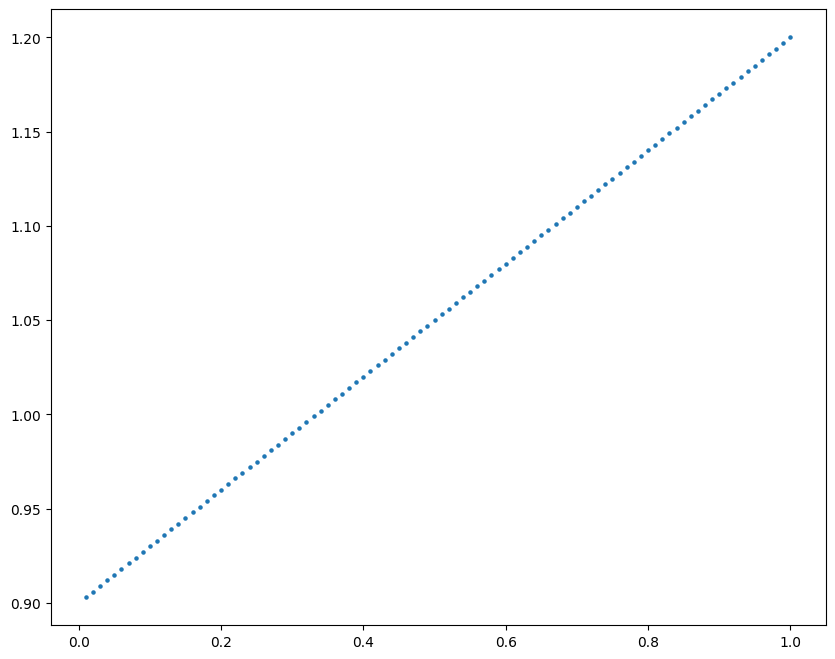

In [3316]:
plt.figure(figsize=(10, 8))
plt.scatter(X, y, s = 5)

In [3317]:
train_size = int(0.8 * len(X))
train_size

80

In [3318]:
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [3319]:
len(X_train), len(X_test), len(y_train), len(y_test)

(80, 20, 80, 20)

In [3320]:
def plot_data(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, y_preds=None):

  plt.figure(figsize=(10, 8))

  plt.scatter(X_train, y_train, s=5, c="b", label="Train data", )
  plt.scatter(X_test, y_test, s=5, c="r", label="Test data")

  if y_preds != None:
    plt.scatter(X_test, y_preds, s=5, c="#000000", label="Predictions on test data")

  plt.legend(prop={"size": 16})

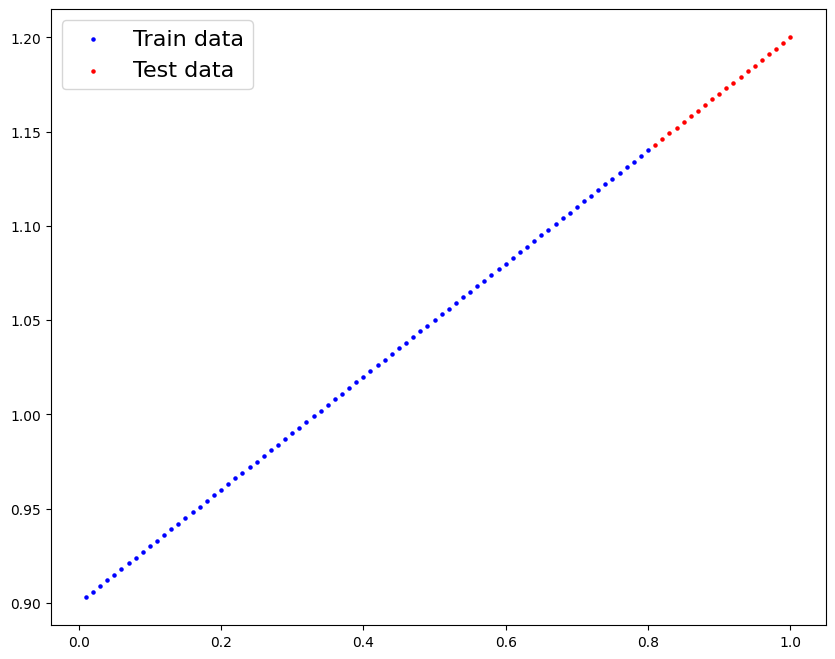

In [3321]:
plot_data()

## 2. Building model

In [3322]:
class LinearRegressionModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = torch.nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
    self.bias = torch.nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

  def forward(self, X : torch.Tensor) -> torch.Tensor:
    return (self.weight * X) + self.bias

In [3323]:
model = LinearRegressionModel()

In [3324]:
model

LinearRegressionModel()

In [3325]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [3326]:
model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [3327]:
loss_fn = torch.nn.L1Loss()
optimizer = torch.optim.SGD(lr=1e-3, params=model.parameters())

## 3. Training model

### steps of model training

In [3328]:
y_preds = model(X_test)

In [3329]:
y_preds

tensor([[0.4015],
        [0.4049],
        [0.4083],
        [0.4116],
        [0.4150],
        [0.4184],
        [0.4217],
        [0.4251],
        [0.4285],
        [0.4318],
        [0.4352],
        [0.4386],
        [0.4419],
        [0.4453],
        [0.4487],
        [0.4520],
        [0.4554],
        [0.4588],
        [0.4621],
        [0.4655]], grad_fn=<AddBackward0>)

In [3330]:
loss = loss_fn(y_preds, y_test)

In [3331]:
loss

tensor(0.7380, grad_fn=<MeanBackward0>)

In [3332]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [3333]:
optimizer.zero_grad()

In [3334]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [3335]:
loss.backward()

In [3336]:
loss

tensor(0.7380, grad_fn=<MeanBackward0>)

In [3337]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [3338]:
optimizer.step()

In [3339]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [3340]:
model.eval()

LinearRegressionModel()

In [3341]:
test_preds = model(X_test)
test_loss = loss_fn(test_preds, y_test)

In [3342]:
test_preds, test_loss

(tensor([[0.4033],
         [0.4066],
         [0.4100],
         [0.4134],
         [0.4168],
         [0.4201],
         [0.4235],
         [0.4269],
         [0.4303],
         [0.4336],
         [0.4370],
         [0.4404],
         [0.4438],
         [0.4471],
         [0.4505],
         [0.4539],
         [0.4573],
         [0.4607],
         [0.4640],
         [0.4674]], grad_fn=<AddBackward0>),
 tensor(0.7362, grad_fn=<MeanBackward0>))

In [3343]:
test_loss.item()

0.7361667156219482

In [3344]:
epochs = 2500

torch.manual_seed(42)

train_loss_vals = []
test_loss_vals = []
epoch_counts = []

for i in range(epochs):
  model.train()

  y_preds = model(X_train)

  training_loss = loss_fn(y_preds, y_train)

  optimizer.zero_grad()
  training_loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    preds = model(X_test)
    test_loss = loss_fn(preds, y_test)

  train_loss_vals.append(training_loss.item())
  test_loss_vals.append(test_loss.item())
  epoch_counts.append(i)

  print(f"Epoch : {i + 1} \t Train loss : {training_loss.item()} \t Test loss : {test_loss.item()}")

Epoch : 1 	 Train loss : 0.7549644708633423 	 Test loss : 0.7348002195358276
Epoch : 2 	 Train loss : 0.7538003921508789 	 Test loss : 0.7334336638450623
Epoch : 3 	 Train loss : 0.7526363730430603 	 Test loss : 0.7320671677589417
Epoch : 4 	 Train loss : 0.7514723539352417 	 Test loss : 0.7307006120681763
Epoch : 5 	 Train loss : 0.7503082752227783 	 Test loss : 0.7293341159820557
Epoch : 6 	 Train loss : 0.7491443157196045 	 Test loss : 0.7279675602912903
Epoch : 7 	 Train loss : 0.7479802370071411 	 Test loss : 0.7266010046005249
Epoch : 8 	 Train loss : 0.7468162178993225 	 Test loss : 0.7252343893051147
Epoch : 9 	 Train loss : 0.7456521987915039 	 Test loss : 0.7238678932189941
Epoch : 10 	 Train loss : 0.7444881200790405 	 Test loss : 0.7225013375282288
Epoch : 11 	 Train loss : 0.7433241605758667 	 Test loss : 0.7211348414421082
Epoch : 12 	 Train loss : 0.7421600222587585 	 Test loss : 0.7197682857513428
Epoch : 13 	 Train loss : 0.7409960627555847 	 Test loss : 0.718401730060

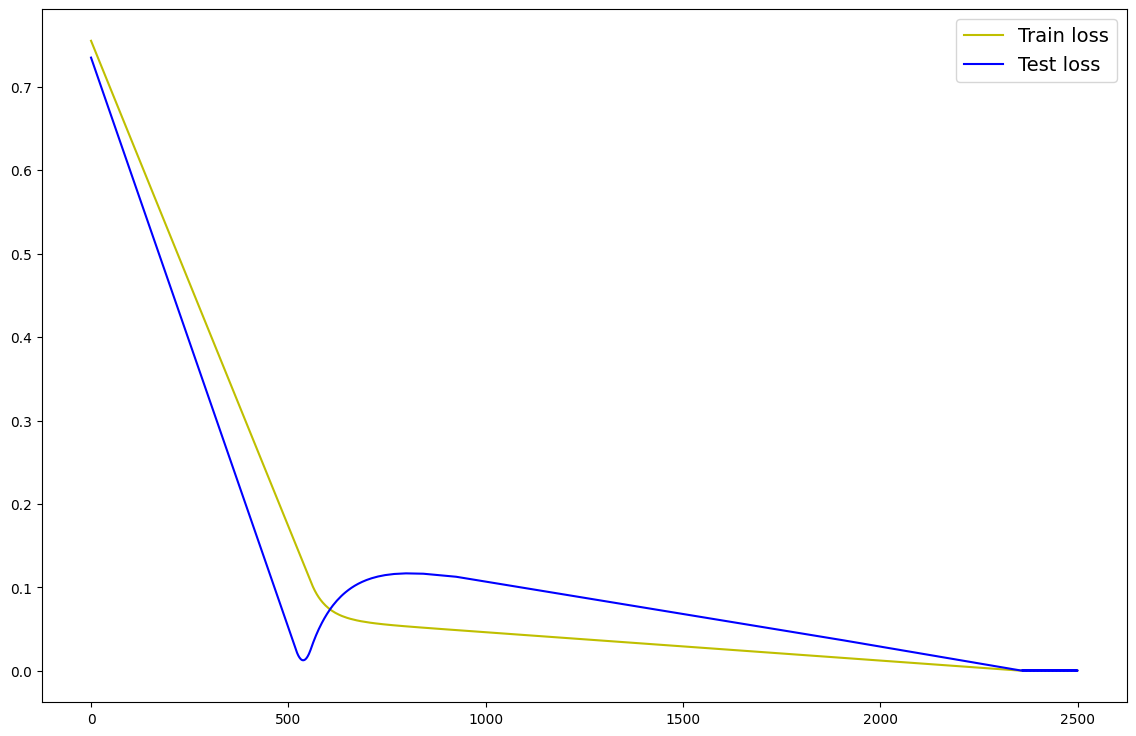

In [3345]:
plt.figure(figsize=(14, 9))
plt.plot(epoch_counts, train_loss_vals, c="y", label="Train loss")
plt.plot(epoch_counts, test_loss_vals, c="b", label="Test loss")
plt.legend(prop={"size": "14"})

## 4. Testing model

In [3346]:
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)

y_preds

tensor([[1.1426],
        [1.1456],
        [1.1486],
        [1.1516],
        [1.1546],
        [1.1576],
        [1.1606],
        [1.1636],
        [1.1666],
        [1.1696],
        [1.1726],
        [1.1756],
        [1.1786],
        [1.1816],
        [1.1846],
        [1.1876],
        [1.1906],
        [1.1936],
        [1.1966],
        [1.1996]])

In [3347]:
y_test

tensor([[1.1430],
        [1.1460],
        [1.1490],
        [1.1520],
        [1.1550],
        [1.1580],
        [1.1610],
        [1.1640],
        [1.1670],
        [1.1700],
        [1.1730],
        [1.1760],
        [1.1790],
        [1.1820],
        [1.1850],
        [1.1880],
        [1.1910],
        [1.1940],
        [1.1970],
        [1.2000]])

In [3348]:
model.state_dict()

OrderedDict([('weight', tensor([0.3004])), ('bias', tensor([0.8993]))])

In [3349]:
weight

0.3

In [3350]:
bias

0.9

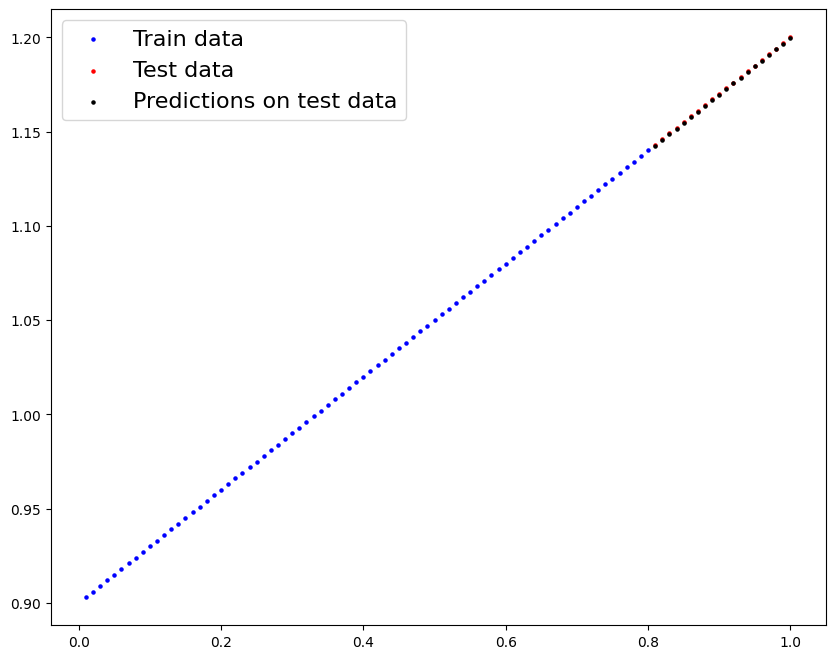

In [3351]:
plot_data(y_preds=y_preds)

## 5. Saving model

In [3353]:
MODEL_PATH = "models/linear-reg_ex1_model.pth"

torch.save(model.state_dict(), MODEL_PATH)

## 6. Load and use the model

In [3354]:
load_model = LinearRegressionModel()

load_model.load_state_dict(torch.load(MODEL_PATH))

load_model.eval()

LinearRegressionModel()

In [3357]:
new_X = torch.tensor([[101.0]], dtype=torch.float32) / 100.0

with torch.inference_mode():
  y_pred = load_model(new_X)

print(f"Prediction for new_X ({new_X.item()}): {y_pred.item()}")

Prediction for new_X (1.0099999904632568): 1.2026453018188477


In [3358]:
y_pred

tensor([[1.2026]])

In [3359]:
new_X

tensor([[1.0100]])

In [3360]:
(new_X * weight) + bias

tensor([[1.2030]])

In [3378]:
def predict(model, raw_X_value: float):
  scaled_X = torch.tensor([[raw_X_value]], dtype=torch.float32) / 100.0

  model.eval()
  with torch.inference_mode():
    y_pred_scaled = model(scaled_X)

  y_pred_original = (y_pred_scaled - 0.9) * 100 + 0.9

  print(f"Prediction for X = {raw_X_value:.2f} → y = {y_pred_original.item():.4f}")
  return y_pred_original

In [3379]:
predict(load_model, 200)

Prediction for X = 200.00 → y = 60.9002


tensor([[60.9002]])

In [3380]:
(200 * weight) + bias

60.9